In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Graph():
 
    def __init__(self, fname):
        
        ip= open(fname, 'r') # Input file
        raw= ip.read().splitlines() # split into lines
        ip.close # close file
        # Attributes
        self.V = len(raw)  # No. of vertices
        self.colour = [0] * self.V # List for assigning colours
        self.graph = [i.split() for i in raw] # splitting adjacency matrix 
        self.colors = [] # for user required colors
        self.chromes= {}
        
    def disp_graph_colors(self): # method to display assigned colors
        chromatic= max(self.colour) # Chromatic number of graph
        print(f'Chromatic number of given graph is {chromatic}')
        print(f'Enter {chromatic} colors')
        # input of user required colors
        self.colors= input("Enter the colors separated by <space>").split()
        while True:
            if len(self.colors)==chromatic:
                break
            if len(self.colors)>chromatic:
                print("Entered colors are more then required")
                dl=input('Please delete a colour: ')
                self.colors.remove(dl)
            if len(self.colors)<chromatic:
                print(f'Entered {chromatic- len(self.colors)} Less colour:')
                al=input('Enter remainig colors: ').split()
                self.colors= self.colors+ al
                
        assigned= {}
        
        for num in self.colour:
            if num in assigned:
                continue
            assigned[num]=self.colors[0]
            self.colors.pop(0)
            
        for c in range(self.V):
            self.chromes[c+1]=assigned[self.colour[c]]
        
        self.g_color()

        
    """
    A utility function to check if the current 
    color assignment is safe for vertex v 
    """    
    def isSafe(self, v, c):
        for i in range(self.V): # to check edges of selected vertex 'v'
            # check  if selected vertex has any adjacent vertex of selected color
            if self.graph[v][i] == '1' and self.colour[i] == c: 
                return False
        return True
 
    # A recursive utility function to solve map coloring  problem
    def graphColourUtil(self, v):
        if v == self.V: # end recursion when all vertices are colored
            return True
 
        for c in range(1,self.V+1): # selecting a color
            # check if selected vertex can be colored with selected color
            if self.isSafe(v, c) == True: 
                self.colour[v] = c # color vertex with selected color
                # recursion by selecting next vertex
                if self.graphColourUtil(v + 1) == True: 
                    return
                return
 
    def g_color(self):
        # Create a graph
        G = nx.Graph()

        # Add nodes
        for node in range(len(self.graph)):
            G.add_node(node+1)

        for i in range(self.V):
            for j in range(self.V):
                if self.graph[i][j]=='1':
                    G.add_edge(i+1, j+1)
        # Draw the graph
        nx.draw(G, with_labels=True, node_color=[self.chromes[x] for x in G.nodes()], node_size=1500, font_size=20, font_color='black')

        # Display the graph
        plt.show()

    def graphColouring(self):
        # calling recursive method for coloring vertices
        self.graphColourUtil(0)
        self.disp_graph_colors() # Print the solution
        return


Enter the name of file for input graph: g.txt
Chromatic number of given graph is 4
Enter 4 colors
Enter the colors separated by <space>red orange yellow pink


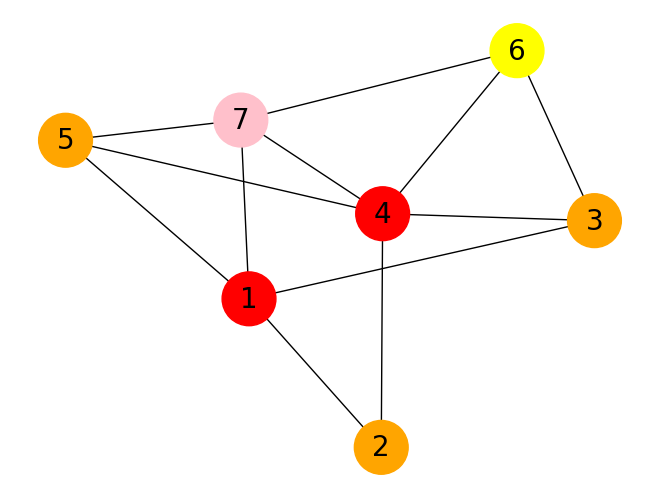

True

In [6]:
# Input for filename of graph
fname= input("Enter the name of file for input graph: ")
g = Graph(fname) # constructor for object initialization
g.graphColouring() # calling main method  for graph coloring